# TASK #1: PROJECT OVERVIEW

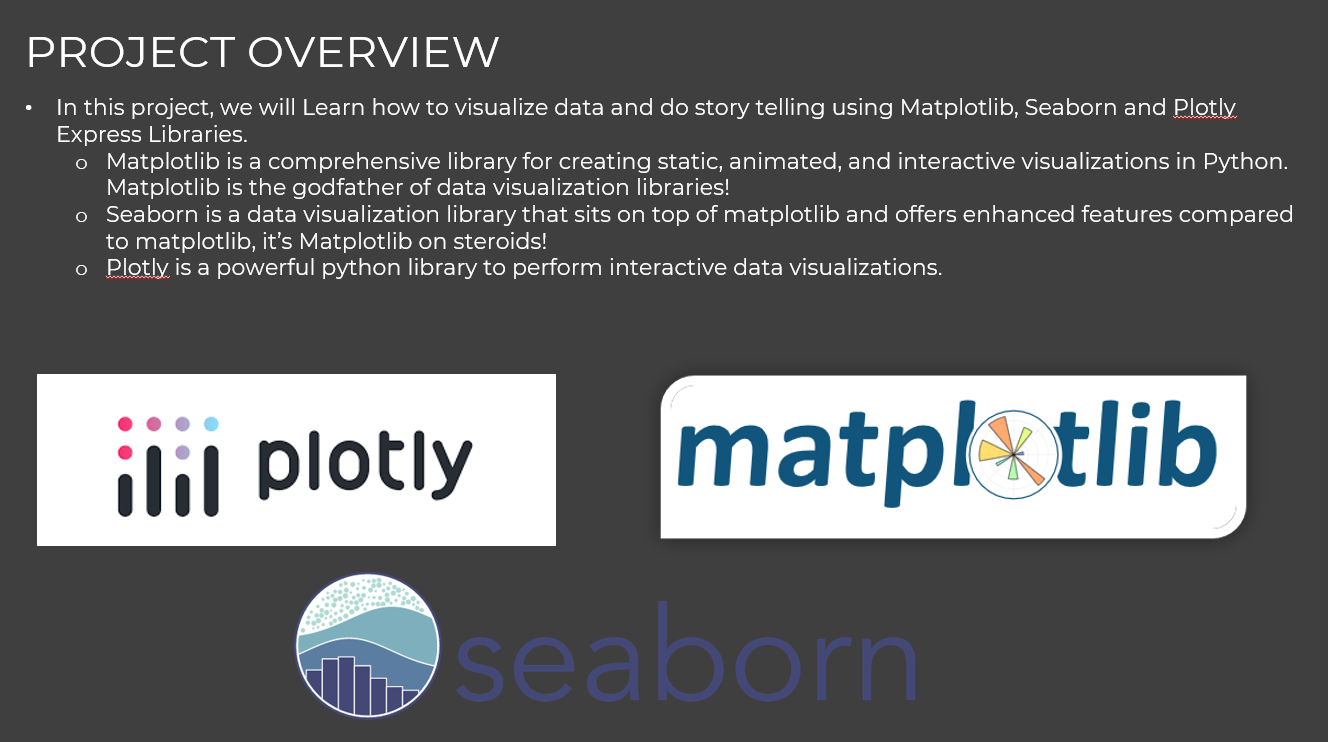

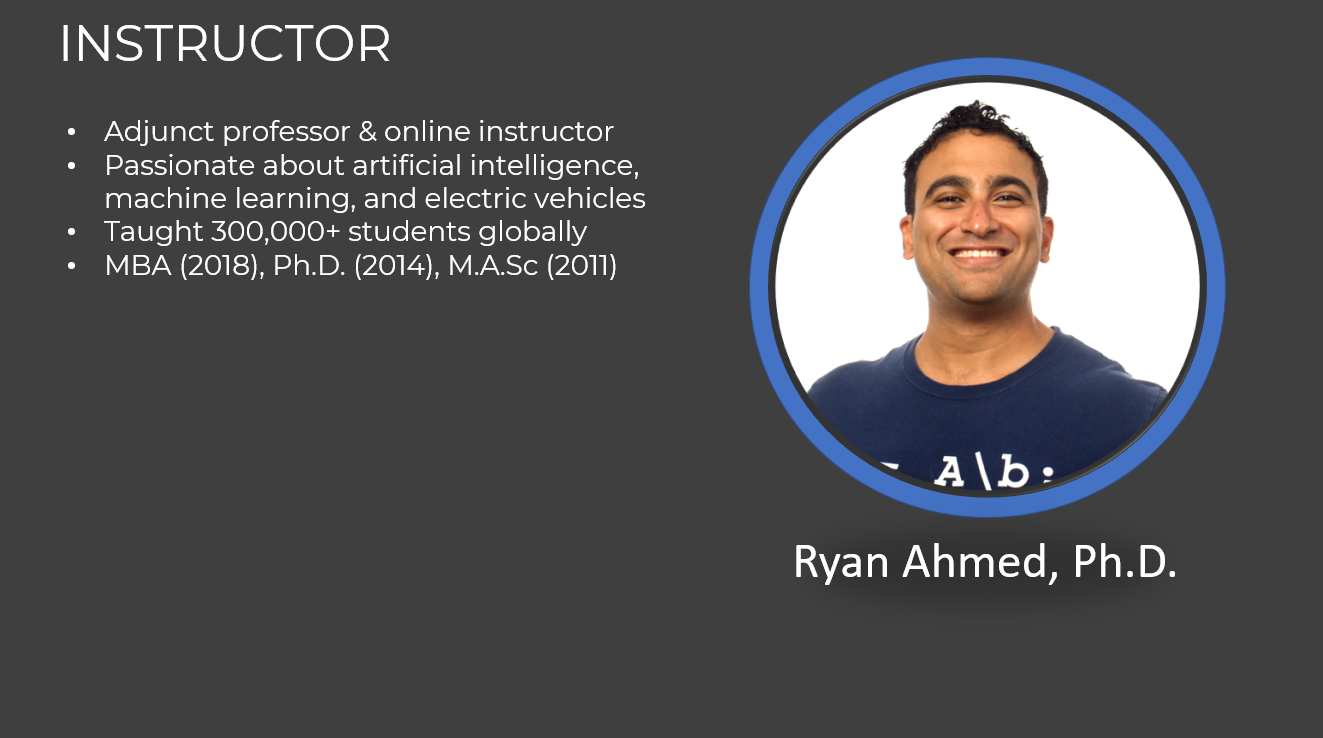

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
# The World Happiness Report determines the state of global happiness. 
# The happiness scores and rankings data has been collected by asking individuals to rank their life.
# Ranking ranges from 0 (worst possible life) to 10 (best possible life). 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [2]:
# Import csv file into pandas dataframe
happy_df = pd.read_csv('happiness_report.csv')

In [3]:
# print the first 5 rows of the dataframe
happy_df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [4]:
happy_df.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **Select 2 countries from the dataframe and explore scores. Perform sanity check.**

In [5]:
happy_df[   happy_df['Country or region'] == 'Canada']

Overall rank Country or region  Score  GDP per capita  Social support  \
8             9            Canada  7.278           1.365           1.505   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
8                    1.039                         0.584       0.285   

   Perceptions of corruption  
8                      0.308

In [6]:
happy_df[   happy_df['Country or region'] == 'Taiwan']

Overall rank Country or region  Score  GDP per capita  Social support  \
24            25            Taiwan  6.446           1.368            1.43   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
24                    0.914                         0.351       0.242   

    Perceptions of corruption  
24                      0.097

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
# Check Null values
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
# Obtain the Statistical summary of the dataframe
happy_df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [10]:
# check the number of duplicated entries in the dataframe
happy_df.duplicated().sum() # since there are no duplicates, no further action is required

0

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:** 
- **Which country has the maximum happiness score? What is the perception of corruption in this country?**

In [11]:
happy_df['Score'].max()

7.769

In [12]:
happy_df[happy_df['Score']== happy_df['Score'].max()]

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

# TASK #4: PERFORM DATA VISUALIZATION: PAIRPLOT & SCATTERMATRIX

In [13]:
# A scatterplot matrix is a matrix associated to n numerical arrays (data variables), $X_1,X_2,…,X_n$ , of the same length. 
# The cell (i,j) of such a matrix displays the scatter plot of the variable Xi versus Xj.
# Here we show the Plotly Express function px.scatter_matrix to plot the scatter matrix for the columns of the dataframe. By default, all columns are considered.

# Note:
# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


fig = px.scatter_matrix(happy_df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']], width = 1500, height = 1500)
fig.show()

<Figure size 500x500 with 0 Axes>

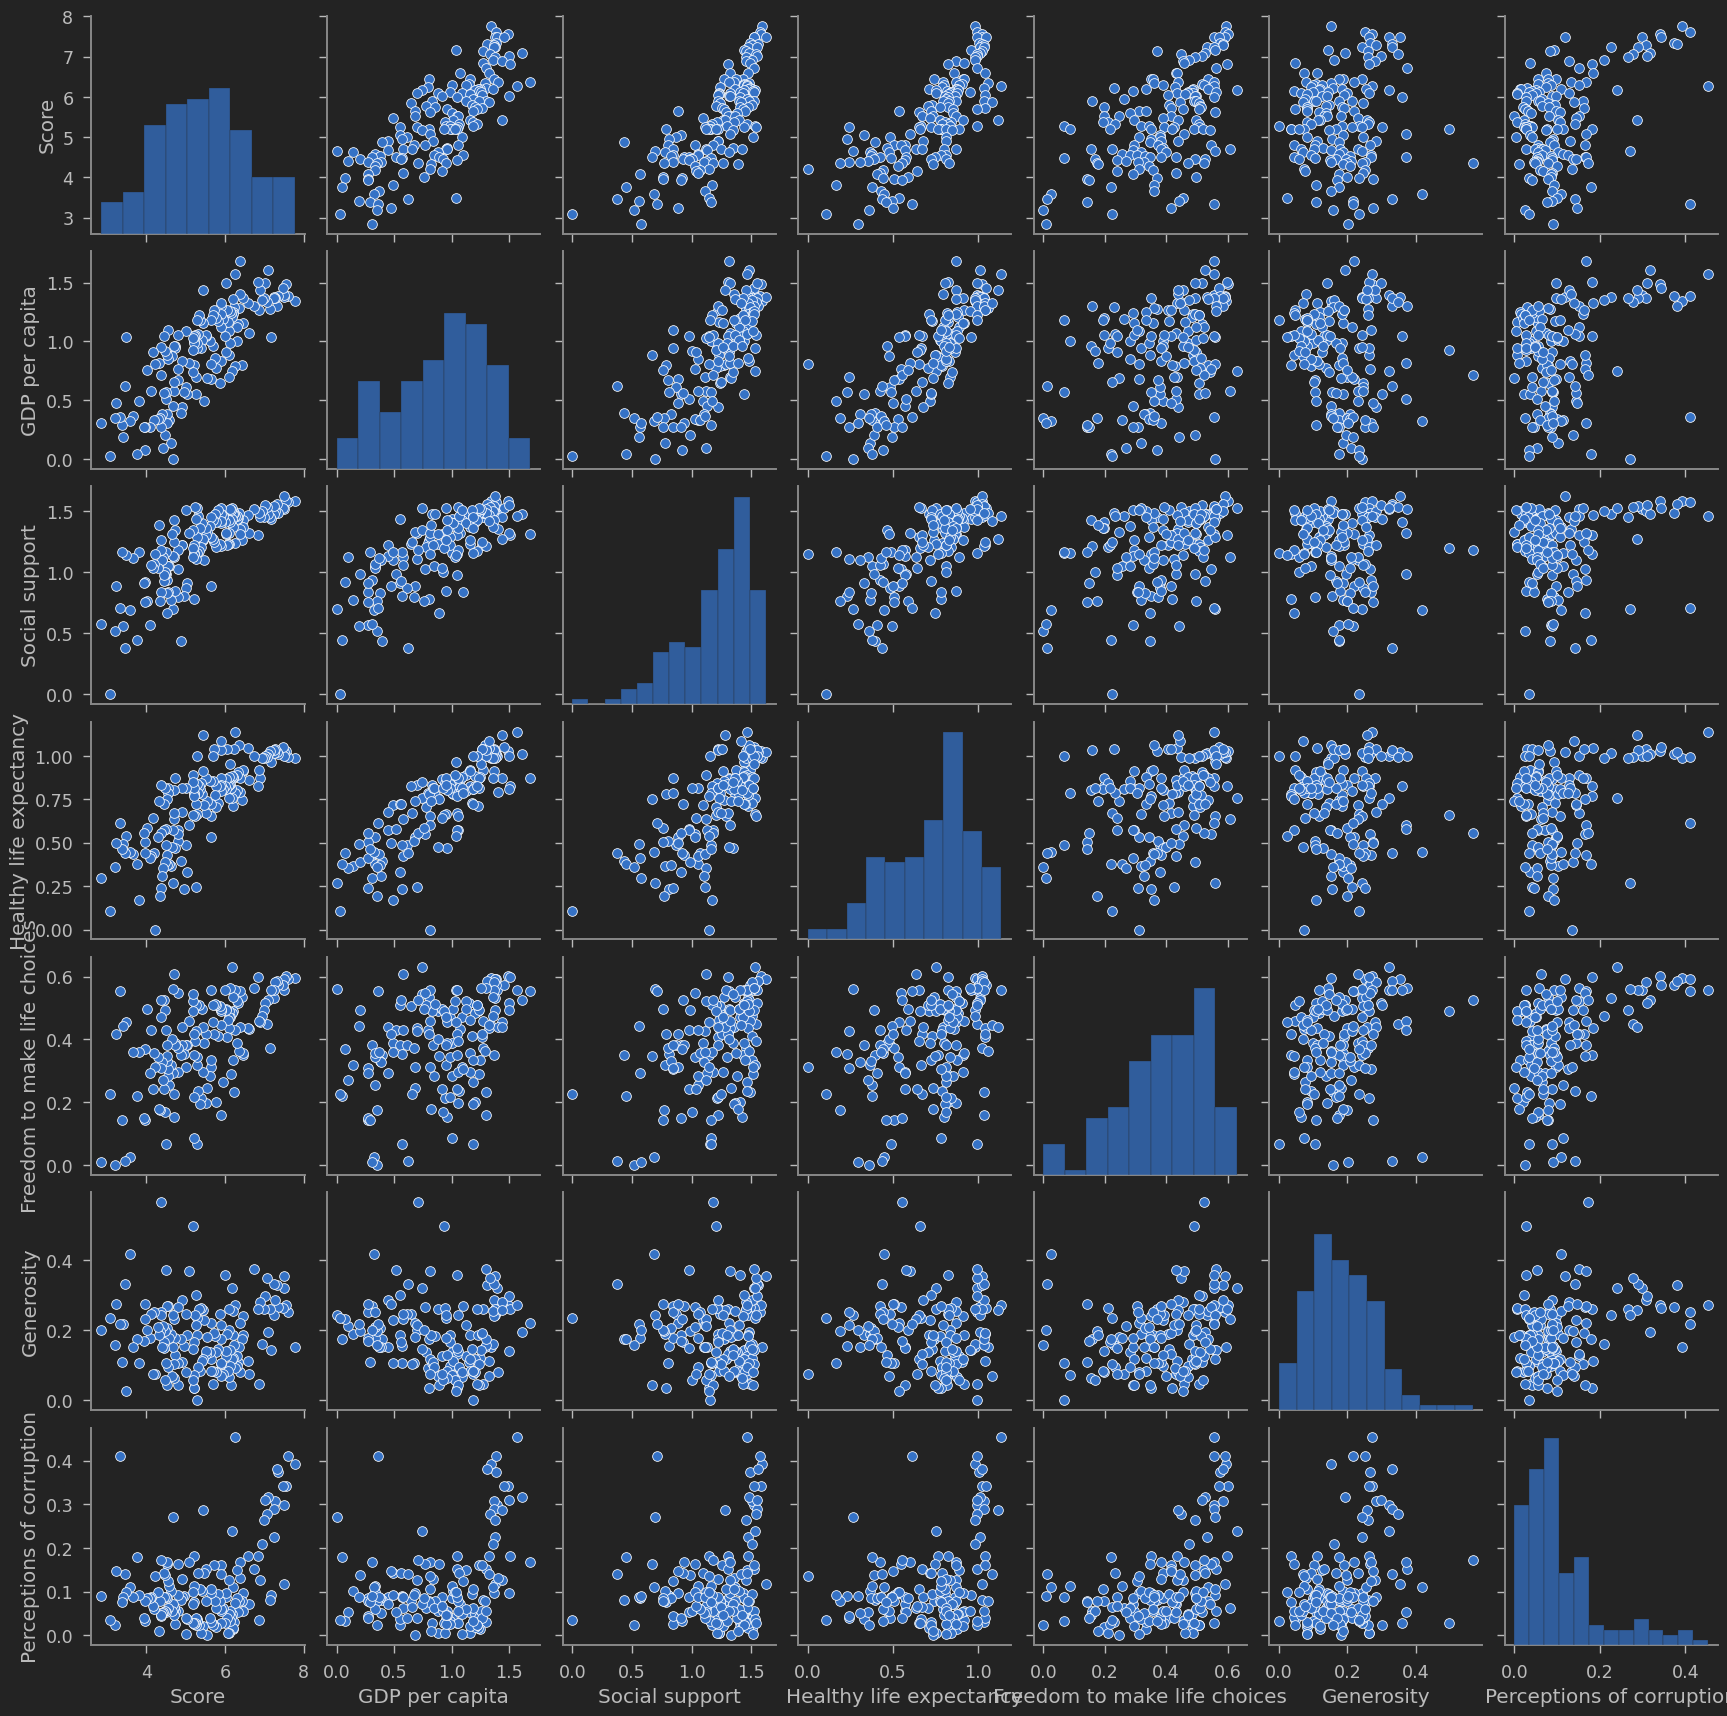

In [14]:
# Alternatively, you can use Seaborn to plot the pairplots as follows (Note that the plot is no longer interactive): 
fig = plt.figure(figsize = (5,5))
sns.pairplot(happy_df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


# TASK #5: PERFORM DATA VISUALIZATION: DISTPLOT & CORRELATION MATRIX

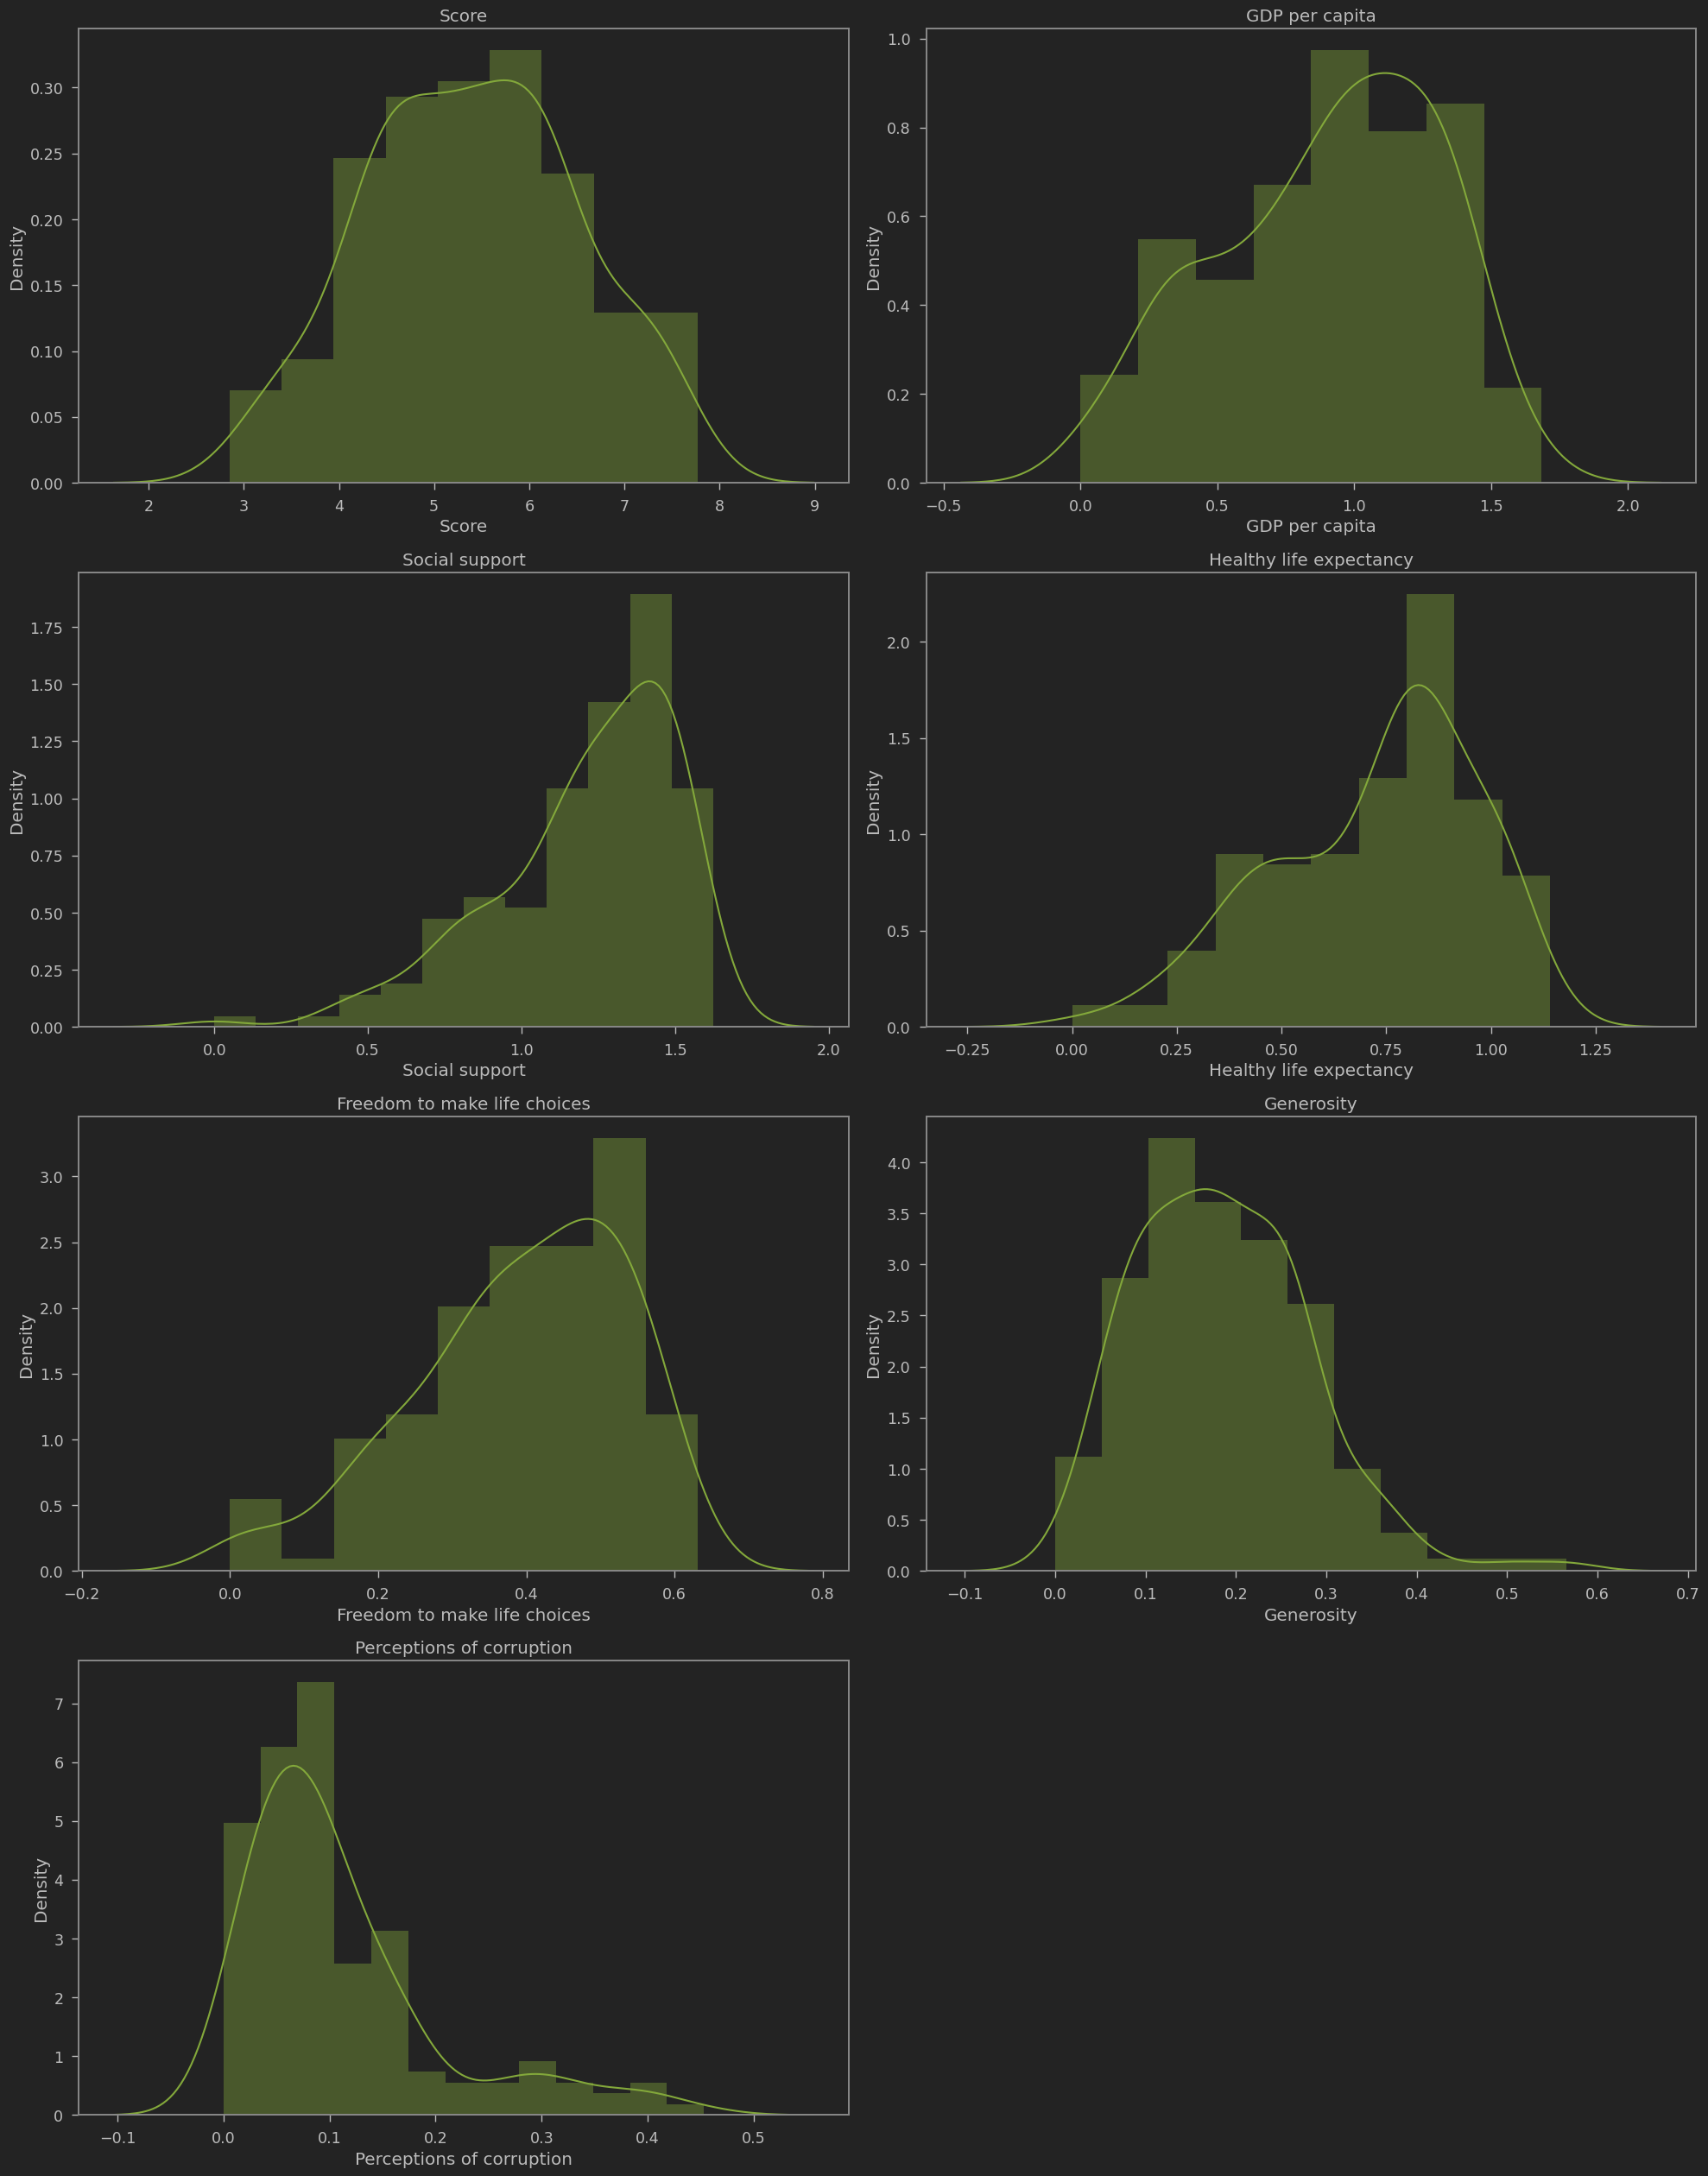

In [15]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()

columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(happy_df[columns[i]], color = 'g');
  plt.title(columns[i])

plt.tight_layout()

In [16]:
happy_df.corr()

Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   -0.801947  0.793883        1.000000   
Social support                   -0.767465  0.777058        0.754906   
Healthy life expectancy          -0.787411  0.779883        0.835462   
Freedom to make life choices     -0.546606  0.566742        0.379079   
Generosity                       -0.047993  0.075824       -0.079662   
Perceptions of corruption        -0.351959  0.385613        0.298920   

                              Social support  Healthy life expectancy  \
Overall rank                       -0.767465                -0.787411   
Score                               0.777058                 0.779883   
GDP per capita                      0.754906                 0.835462   
Social support                      1.000000                 0.719009   
Healthy life expectancy             0.719009                 1.000000   
Freedom to make life choices        0.447333                 0.390395   
Generosity                         -0.048126                -0.029511   
Perceptions of corruption           0.181899                 0.295283   

                              Freedom to make life choices  Generosity  \
Overall rank                                     -0.546606   -0.047993   
Score                                             0.566742    0.075824   
GDP per capita                                    0.379079   -0.079662   
Social support                                    0.447333   -0.048126   
Healthy life expectancy                           0.390395   -0.029511   
Freedom to make life choices                      1.000000    0.269742   
Generosity                                        0.269742    1.000000   
Perceptions of corruption                         0.438843    0.326538   

                              Perceptions of corruption  
Overall rank                                  -0.351959  
Score                                          0.385613  
GDP per capita                                 0.298920  
Social support                                 0.181899  
Healthy life expectancy                        0.295283  
Freedom to make life choices                   0.438843  
Generosity                                     0.326538  
Perceptions of corruption                      1.000000

In [17]:
fig = px.imshow(happy_df.corr())
fig.show()

<AxesSubplot: >

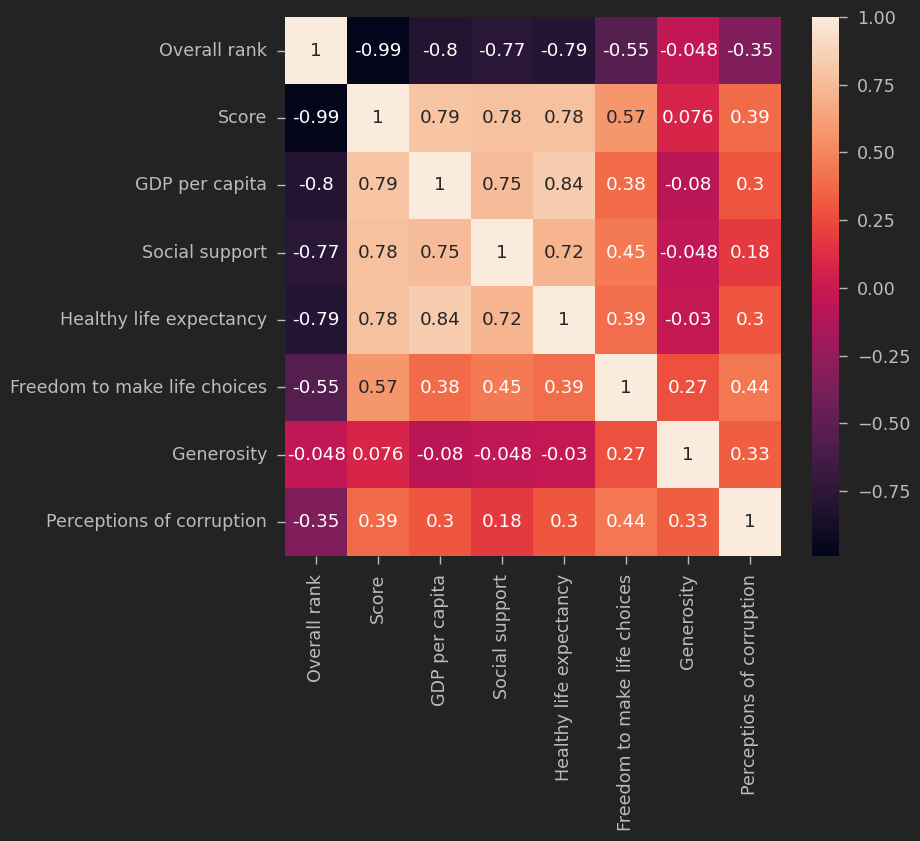

In [18]:
# Get the correlation matrix
corr_matrix = happy_df.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

# TASK #6: PERFORM DATA VISUALIZATION: SCATTERPLOTS AND BUBBLE CHARTS

In [19]:
# Plot the relationship between score, GDP and region
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score', text = 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [20]:
# Plot the relationship between score and GDP (while adding color and size)
fig = px.scatter(happy_df, x = "GDP per capita", y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region")

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [21]:
import plotly.express as px

# 畫散點圖
fig = px.scatter(
    happy_df,
    x="GDP per capita", 
    y="Score", 
    size="Overall rank", 
    color="Country or region", 
    hover_name="Country or region",
    title="Happiness Score vs GDP per Capita"
)

# 找出台灣的數值
taiwan = happy_df[happy_df['Country or region'] == 'Taiwan']
gdp_taiwan = taiwan['GDP per capita'].values[0]
score_taiwan = taiwan['Score'].values[0]

# 在圖上加註解
fig.add_annotation(
    x=gdp_taiwan,
    y=score_taiwan,
    text="Taiwan",
    showarrow=True,
    arrowhead=2,
    ax=20,  # 箭頭水平偏移
    ay=-40  # 箭頭垂直偏移
)

fig.show()


In [22]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

# FINAL CAPSTONE PROJECT 

Using "cars.csv" dataset included in the guided project package, please complete the following tasks: 
- 1. Using Pandas, read the "cars.csv" dataset
- 2. Perform exploratory data analysis
- 3. Remove $ sign and comma (,) from MSRP and Invoice columns
- 4. Convert MSRP and Invoice columns to integer datatypes and perform sanity check on the data
- 5. Plot the scattermatrix and pairplot
- 6. Plot a scatterplot between 'Horsepower' and 'MSRP' while showing 'Make' as text. Use the 'Cylinders' column to display color.
- 7. Plot the wordcloud of the Make column
- 8. Plot the histogram of Make and Type of the car using Plotly Express
- 9. Find out which manufacturer has high number of Sports type 
- 10. Find out which manufacturers has Hybrids
- 11. Plot the correlation matrix using plotly express and Seaborn
- 12. Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Select 2 countries from the dataframe and explore scores. Perform sanity check.**

In [23]:
happy_df[happy_df['Country or region']=='Canada']

Overall rank Country or region  Score  GDP per capita  Social support  \
8             9            Canada  7.278           1.365           1.505   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
8                    1.039                         0.584       0.285   

   Perceptions of corruption  
8                      0.308

In [24]:
happy_df[happy_df['Country or region']=='Taiwan']

Overall rank Country or region  Score  GDP per capita  Social support  \
24            25            Taiwan  6.446           1.368            1.43   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
24                    0.914                         0.351       0.242   

    Perceptions of corruption  
24                      0.097

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Which country has the maximum happiness score? What is the perception of corruption in this country?**

In [25]:
happy_df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [26]:
happy_df[happy_df['Score'] == 7.769000]

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

# FINAL CAPSTONE PROJECT SOLUTION

In [27]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization


In [28]:
# Read the CSV file 
car_df = pd.read_csv("cars.csv")

In [29]:
# Load the top 10 instances
car_df.head(10)

Make                    Model    Type  Origin DriveTrain     MSRP  \
0  Acura                      MDX     SUV    Asia        All  $36,945   
1  Acura           RSX Type S 2dr   Sedan    Asia      Front  $23,820   
2  Acura                  TSX 4dr   Sedan    Asia      Front  $26,990   
3  Acura                   TL 4dr   Sedan    Asia      Front  $33,195   
4  Acura               3.5 RL 4dr   Sedan    Asia      Front  $43,755   
5  Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  $46,100   
6  Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  $89,765   
7   Audi              A4 1.8T 4dr   Sedan  Europe      Front  $25,940   
8   Audi   A41.8T convertible 2dr   Sedan  Europe      Front  $35,940   
9   Audi               A4 3.0 4dr   Sedan  Europe      Front  $31,840   

   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  $33,337         3.5        6.0         265        17           23    4451   
1  $21,761         2.0        4.0         200        24           31    2778   
2  $24,647         2.4        4.0         200        22           29    3230   
3  $30,299         3.2        6.0         270        20           28    3575   
4  $39,014         3.5        6.0         225        18           24    3880   
5  $41,100         3.5        6.0         225        18           24    3893   
6  $79,978         3.2        6.0         290        17           24    3153   
7  $23,508         1.8        4.0         170        22           31    3252   
8  $32,506         1.8        4.0         170        23           30    3638   
9  $28,846         3.0        6.0         220        20           28    3462   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
5        115     197  
6        100     174  
7        104     179  
8        105     180  
9        104     179

In [30]:
# Load the bottom 10 instances 
car_df.tail(10)

Make                    Model   Type  Origin DriveTrain     MSRP  \
418  Volvo              S60 2.5 4dr  Sedan  Europe        All  $31,745   
419  Volvo               S60 T5 4dr  Sedan  Europe      Front  $34,845   
420  Volvo                S60 R 4dr  Sedan  Europe        All  $37,560   
421  Volvo              S80 2.9 4dr  Sedan  Europe      Front  $37,730   
422  Volvo             S80 2.5T 4dr  Sedan  Europe        All  $37,885   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
418  $29,916         2.5        5.0         208        20           27   
419  $32,902         2.3        5.0         247        20           28   
420  $35,382         2.5        5.0         300        18           25   
421  $35,542         2.9        6.0         208        20           28   
422  $35,688         2.5        5.0         194        20           27   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
418    3903        107     180  
419    3766        107     180  
420    3571        107     181  
421    3576        110     190  
422    3691        110     190  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [31]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [32]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()


Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [33]:
# Obtain the summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [34]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns

car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

car_df["MSRP"]

car_df["Invoice"] = car_df["Invoice"].str.replace("$", "")
car_df["Invoice"] = car_df["Invoice"].str.replace(",", "")
car_df["Invoice"] = car_df["Invoice"].astype(int)

# Let's view the updated MSRP and Invoice Columns
car_df.head()

# Display the updated summary of the dataframe
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


In [35]:
fig = px.scatter_matrix(car_df, width = 2000, height = 2000)
fig.show()


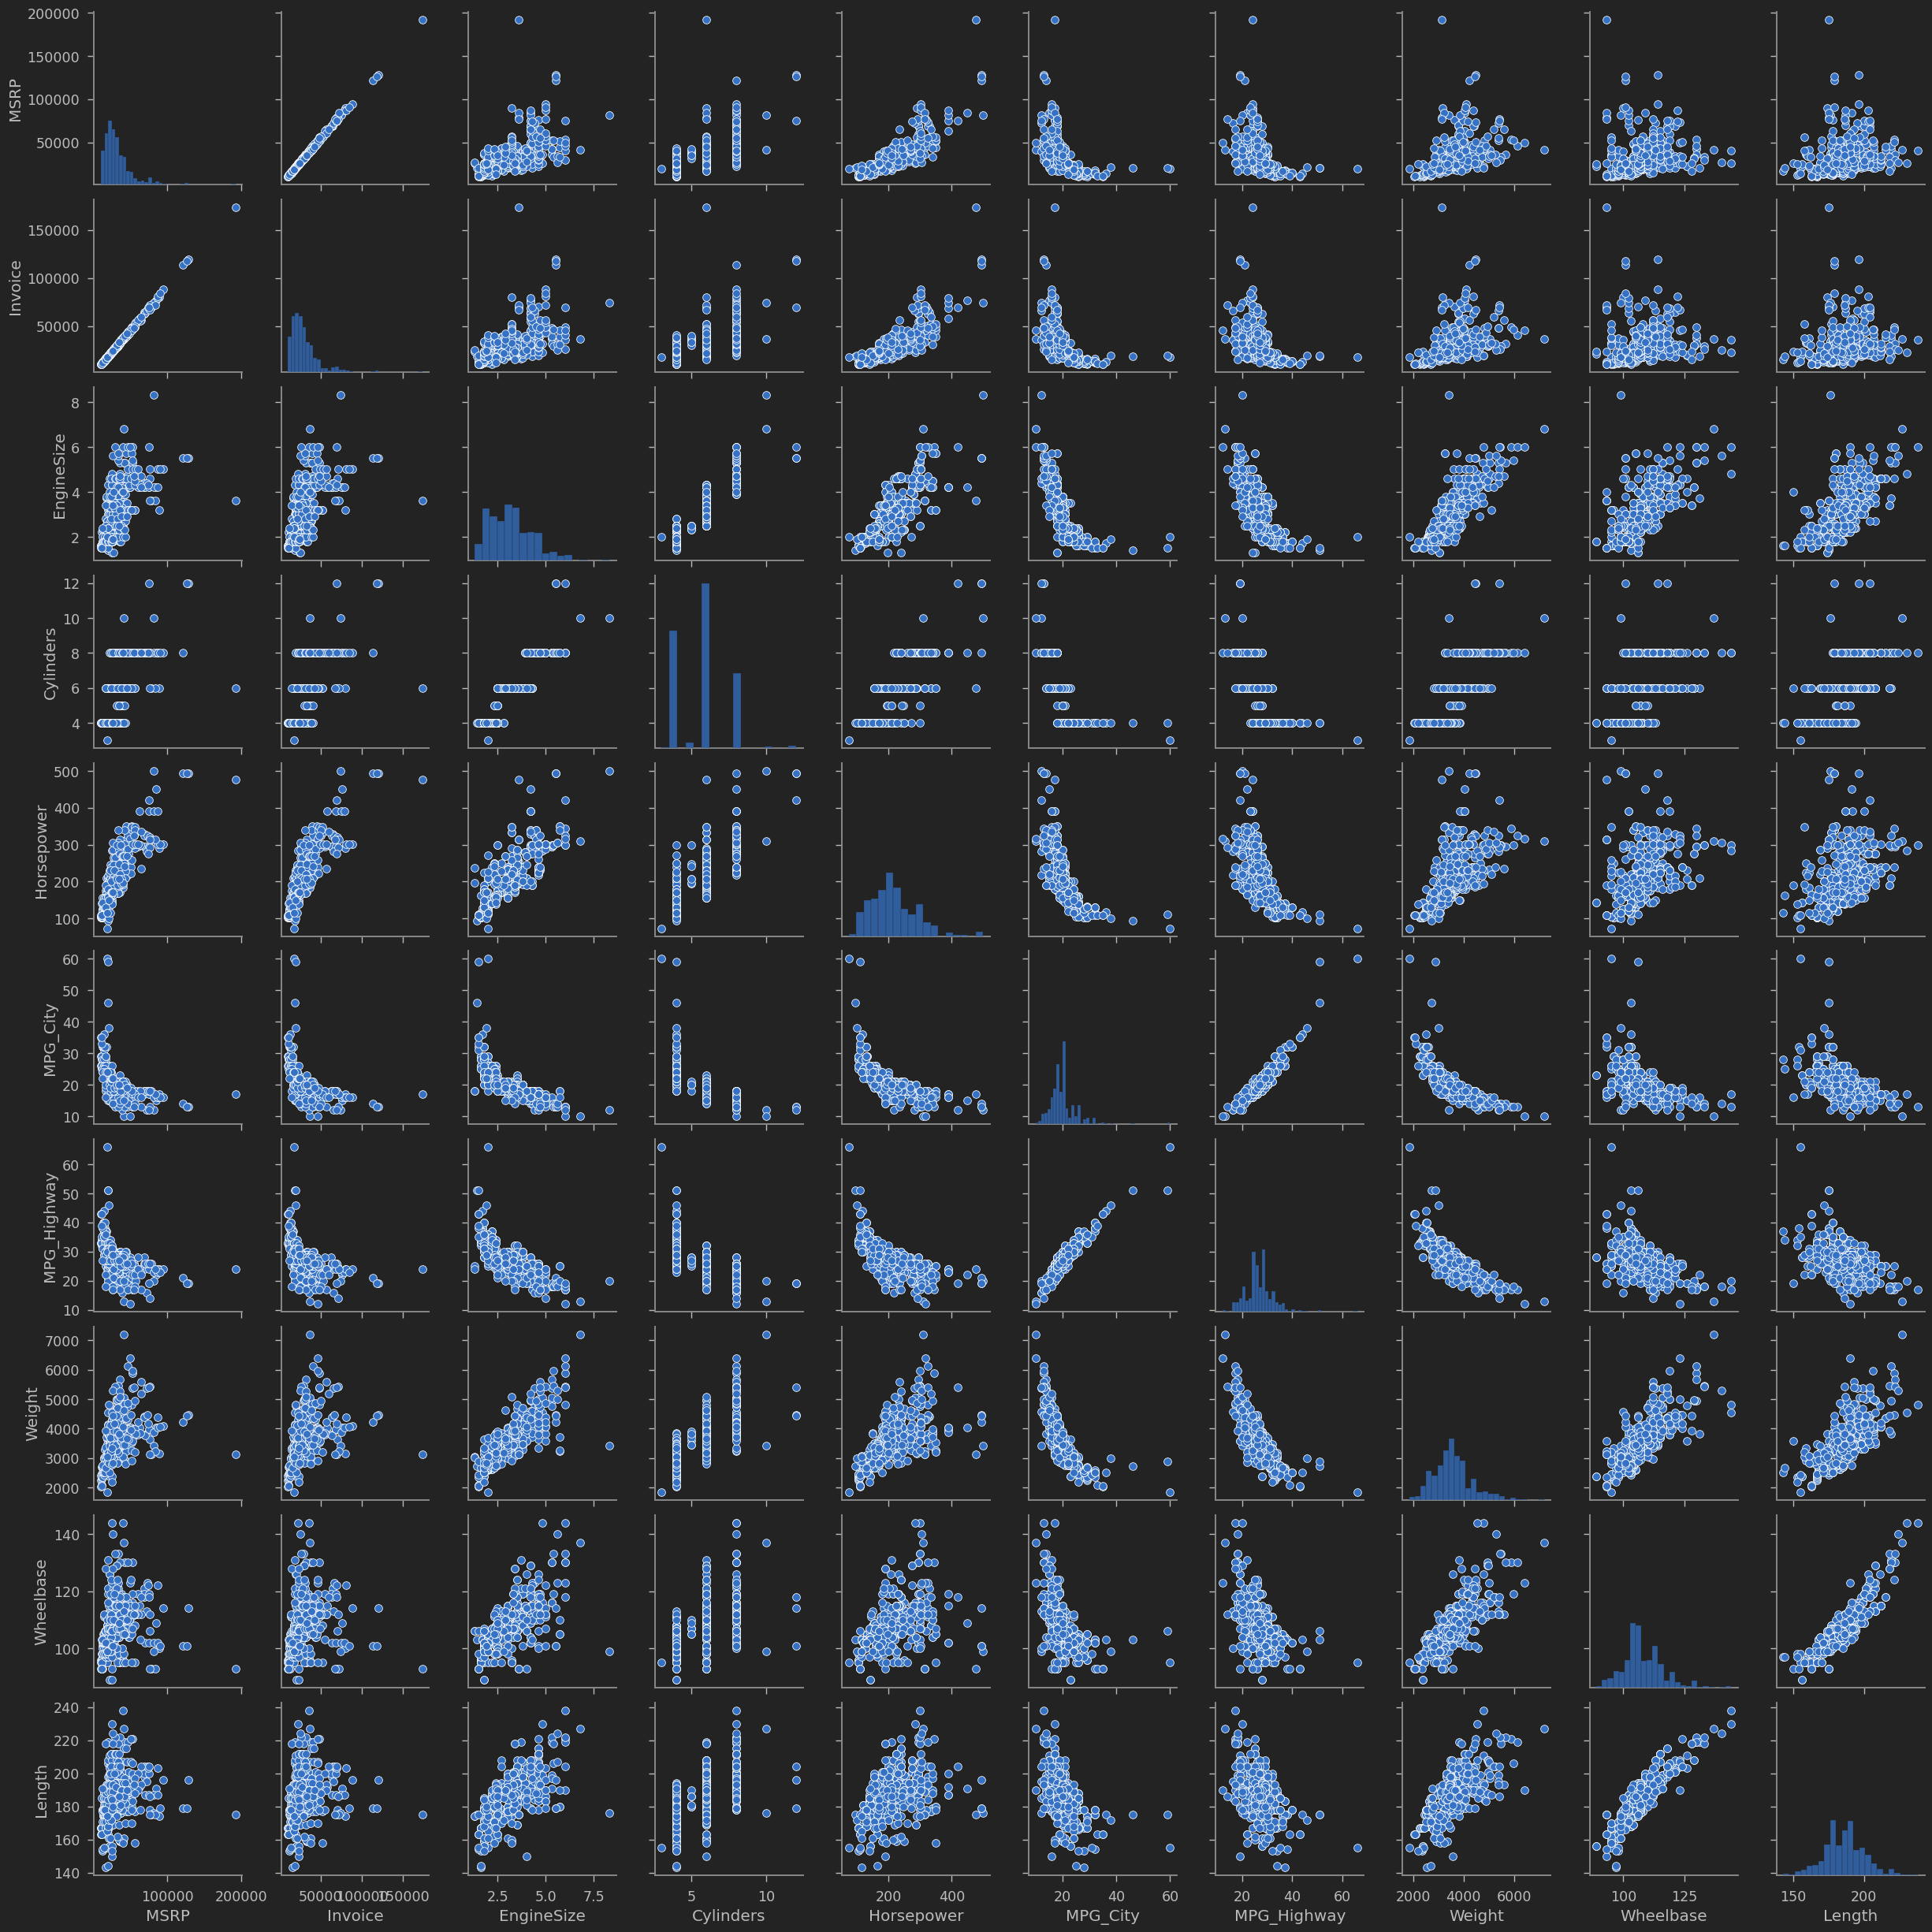

In [36]:
# Alternatively, you can use scatterplots to show the joint relationships and histograms for univariate distributions
sns.pairplot(data = car_df) 

In [37]:

fig = px.scatter(car_df, x = 'Horsepower', y = 'MSRP', text = car_df['Make'], color = car_df['Cylinders'])
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.update_layout(width = 1000)

fig.show()

In [38]:
# Let's view various makes of the cars
car_df.Make.unique()


array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [39]:
fig = px.histogram(car_df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["maroon"])
fig.show()


In [40]:
# Let's view various types of the cars
car_df.Type.unique()

fig = px.histogram(car_df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["blue"])
                  
fig.show()

In [41]:
# Let's plot the location
car_df.Origin.unique()

fig = px.histogram(car_df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()


In [42]:
# Let's view the drivetrain of the cars
car_df.DriveTrain.unique()

fig = px.histogram(car_df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["BLACK"])
                  
fig.show()

In [43]:
# Plot the make of the car and its location
fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

In [44]:
car_df

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[428 rows x 15 columns]

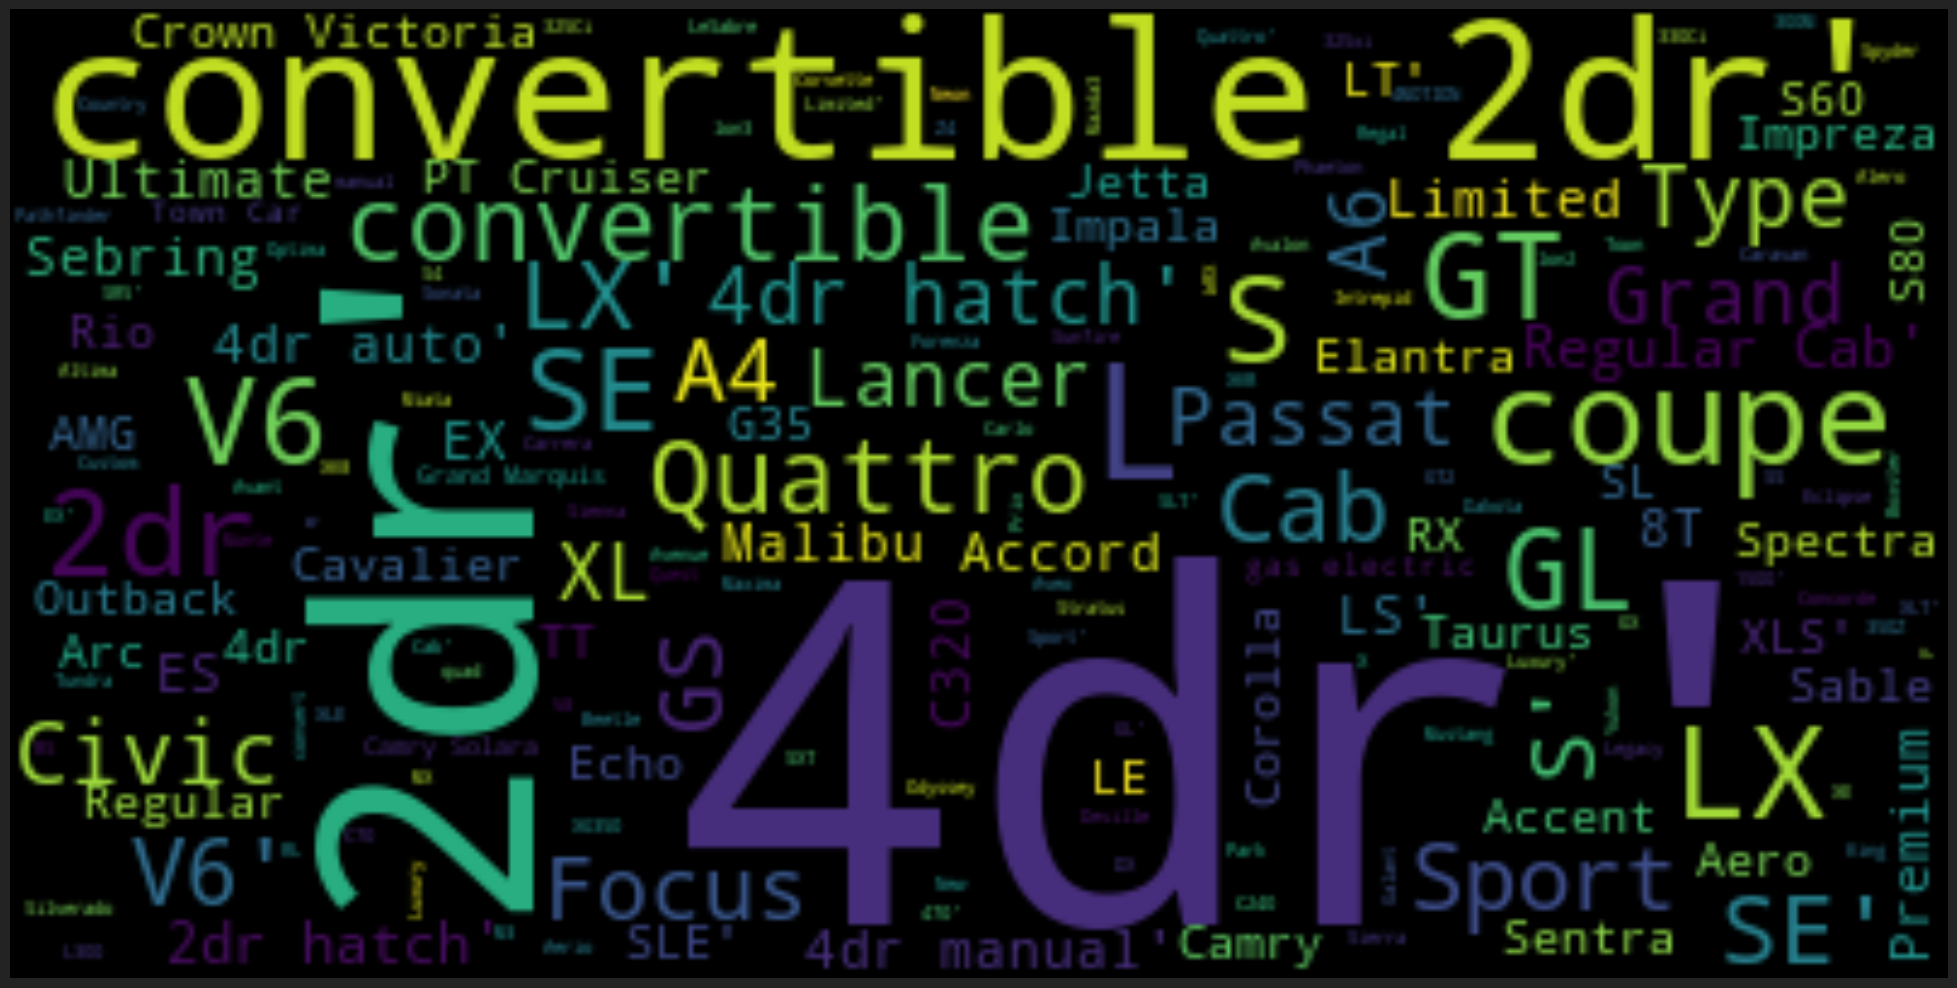

In [45]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

car_df

text = car_df.Model.values

stopwords = set(STOPWORDS)

wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))       

fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [46]:

# Obtain the correlation matrix
car_df.corr()

fig = px.imshow(car_df.corr())
fig.show()


<AxesSubplot: >

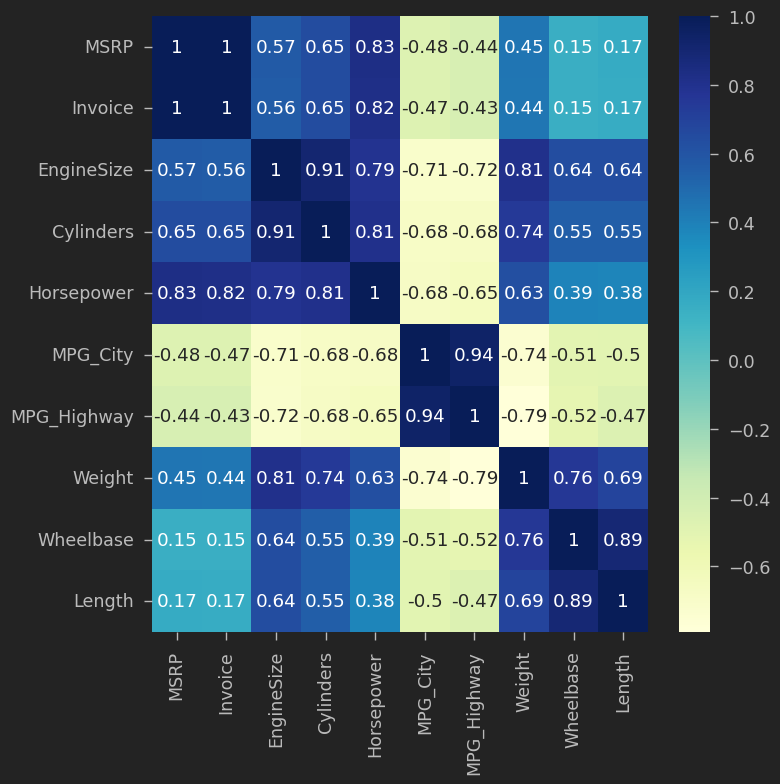

In [47]:
plt.figure(figsize = (8,8))
sns.heatmap(car_df.corr(), cmap="YlGnBu", annot = True)

In [48]:
fig = px.histogram(car_df, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE AND TYPE OF THE CAR",
                  opacity = 1)
                  
fig.show()

# Porsche
# Honda and Toyota


# Positive correlation between engine size and number of cylinders
# Positive correlation between horsepower and number of cylinders
# highest positive correlation with MSRP is = horsepower


# EXCELLENT JOB!